<a href="https://colab.research.google.com/github/chingyunghuang/news-in-word-cloud/blob/main/%E7%94%A8%E6%96%87%E5%AD%97%E9%9B%B2%E5%91%88%E7%8F%BE%E6%96%B0%E8%81%9E%E9%97%9C%E9%8D%B5%E5%AD%97_for_daily_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 用web crawling 的方式抓取google news 的所有daily news 的標題

Import library

In [1]:
import requests
import pandas as pd
from datetime import date
from bs4 import BeautifulSoup

嘗試將每篇google news - 台灣 標題、新聞來源、網址抓出來

In [2]:
headers = {
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'
}

rs = requests.Session()
res = rs.get('https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNRFptTXpJU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant', headers=headers)
soup = BeautifulSoup(res.text, 'html.parser')
result=[]

url_head='https://news.google.com/'
items = soup.find_all('div',jscontroller='MRcHif')
for item in items:
    for i in item.find('div',jsname='gKDw6b'):
        try:
            
            text=i.find_all('a')[1].text
            url=i.find_all('a')[1]['href']
            url=url.split('/',1)[1]
            url=url_head+url
            news=i.find_all('a')[2].text
            result.append([text,news,url])
            
        except:
            pass
        
        
google_taiwan_news = pd.DataFrame(result, columns=['News_title','News_source','Url'])
google_taiwan_news['date']=date.today()
google_taiwan_news.head()

,News_title,News_source,Url,date
0,直擊／女兒余苑綺病情群醫束手無策！李亞萍淚灑記者會現場,Yahoo奇摩新聞,https://news.google.com/articles/CBMijAJodHRwc...,2022-07-26
1,余苑綺病情又惡化 李亞萍痛哭：醫師都束手無策,自由娛樂,https://news.google.com/articles/CBMiMGh0dHBzO...,2022-07-26
2,金融時報：白宮反對裴洛西訪台恐讓北京得寸進尺 引發各國寒蟬效應,新頭殼,https://news.google.com/articles/CBMiLmh0dHBzO...,2022-07-26
3,恫嚇裴洛西計畫訪台！不排除軍事回應 北京「嚴陣以待」,Yahoo奇摩新聞,https://news.google.com/articles/CBMiiwJodHRwc...,2022-07-26
4,冷眼集／官邸變「喬家大院」 綠不演了,udn.com,https://news.google.com/articles/CBMiKWh0dHBzO...,2022-07-26


# 統計daily news 標題常出現的字詞

下載官方字典檔

In [6]:
!wget 'https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big'

--2022-07-26 07:58:59--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘dict.txt.big’

dict.txt.big        100%[===================>]   8.18M  --.-KB/s    in 0.03s   

2022-07-26 07:58:59 (291 MB/s) - ‘dict.txt.big’ saved [8583143/8583143]



載入套件與字典檔

In [8]:
import jieba
from jieba import load_userdict
jieba.load_userdict("dict.txt.big")

下載官方字典檔（stopword)

In [15]:
!wget https://raw.githubusercontent.com/goto456/stopwords/master/cn_stopwords.txt

--2022-07-26 08:15:47--  https://raw.githubusercontent.com/goto456/stopwords/master/cn_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4717 (4.6K) [text/plain]
Saving to: ‘cn_stopwords.txt’

cn_stopwords.txt    100%[===================>]   4.61K  --.-KB/s    in 0s      

2022-07-26 08:15:47 (62.7 MB/s) - ‘cn_stopwords.txt’ saved [4717/4717]



將stopword變成一個list

In [36]:
stopwords=[]

for word in open('cn_stopwords.txt','r'):

    stopwords.append(word.strip())

In [17]:
title_list=list(google_taiwan_news['News_title'])
print(title_list)

['直擊／女兒余苑綺病情群醫束手無策！李亞萍淚灑記者會現場', '余苑綺病情又惡化 李亞萍痛哭：醫師都束手無策', '金融時報：白宮反對裴洛西訪台恐讓北京得寸進尺 引發各國寒蟬效應', '恫嚇裴洛西計畫訪台！不排除軍事回應 北京「嚴陣以待」', '冷眼集／官邸變「喬家大院」 綠不演了', '蘇貞昌官邸邀參選人談選舉侯友宜一句話回應了@中時新聞網', '發內部信稱林智堅論文案為「醜聞」 黃帝穎：蘇宏達應依法迴避', '林智堅堅稱論文「原創」大學教授抓漏：有學位後還自稱「準碩士」？', '深綠教授不忍了！怒揭「停賽真相」 曝球星皮肉傷：小題大作', '奇文共賞？「翁達瑞」竟控中職球員工會是國民黨自己人 慘被棒球迷打爆臉', '滷味攤老闆遭槍擊是誤殺？兇嫌前妻：我只是常去買滷味', '滷味攤老闆有十年女友⋯家屬哭「認錯人」 兇嫌是飯店主廚', '陳時中、黃珊珊出席Model APEC 立委：蔣萬安一再消失', '蔣萬安團隊675歲 陳時中：年輕找老的「我老就找年輕的」', '萬安演習Q&A！中部「這地區」需離車疏散 依指示避難或躲騎樓', '萬安45號演習擴大舉辦 台中文心路警報響瞬無人潮車流', '國軍漢光演習今登場…神秘機動飛彈部隊台東亮相 軍事迷過癮', '漢光38號「海空操演」登場 16機20艦秀壯盛軍容（圖輯）', '柯文哲認「突然砍掉敬老金」是錯的！點名這人惹事：我最氣', '柯文哲認突然砍掉敬老金是錯的！點名「這人提議」：我最氣｜三立新聞網SETN.com', '新竹棒球場爭議延燒 錢定遠：完全沒考量到電視轉播', '林智堅12億棒球場掀滔天巨浪 她脫口洩一句：陳時中也快了', '高溫逐日微降1℃ 氣象專家：周六起大氣不穩定有較大雨勢', '雙北花東6縣市高溫特報 周四起降雨機率逐日增', '蔡正元入列蔣萬安戰隊 陳時中：我的團隊社會認同度較高│TVBS新聞網', '蔣萬安競選團隊曝光！遭酸「千歲戰隊」 年輕人都不見了', '腫臉照看不出是弟弟 林志穎哥衝醫院「血都準備好了」', '林志穎身體狀況持續好轉 將進行手術', '另一波BA.5疫情海嘯將至？學者估：大約在8月中下旬', '天選之人易被BA.5感染？王必勝：機會確實較大！', '看好一個人 藍大咖爆：國民黨2024有贏的機會', '獨家/柯文哲談2024 拋「想像沒有國民黨的侯友宜會變怎麼樣」', 

get rid of stopword

In [18]:
stayline=""
new_list=[]

for line in title_list:
    for word in line:
        if word not in stopwords:
            stayline+=word
    new_list.append(stayline)
    stayline=""
new_list

['直擊／女兒余苑綺病情群醫束手無策李亞萍淚灑記會現場',
 '余苑綺病情惡化 李亞萍痛哭醫師束手無策',
 '金融時報白宮反對裴洛西訪台恐讓北京寸進尺 引發國寒蟬效應',
 '恫嚇裴洛西計畫訪台排軍事回應 北京「嚴陣」',
 '冷眼集／官邸變「喬家院」 綠演',
 '蘇貞昌官邸邀參選談選舉侯友宜句話回應@中時新聞網',
 '發內部信稱林智堅論文案為「醜聞」 黃帝穎蘇宏達應法迴避',
 '林智堅堅稱論文「原創」學教授抓漏學位後還稱「準碩士」',
 '深綠教授忍怒揭「停賽真相」 曝球星皮肉傷題作',
 '奇文共賞「翁達瑞」竟控中職球員工會國民黨 慘棒球迷爆臉',
 '滷味攤老闆遭槍擊誤殺兇嫌前妻常買滷味',
 '滷味攤老闆十年女友⋯家屬哭「認錯」 兇嫌飯店主廚',
 '陳時中黃珊珊出席Model APEC 立委蔣萬安消失',
 '蔣萬安團隊歲 陳時中年輕找老「老找年輕」',
 '萬安演習Q&A中部「這區」需離車疏散 指示避難躲騎樓',
 '萬安號演習擴舉辦 台中文心路警報響瞬無潮車流',
 '國軍漢光演習登場…神秘機動飛彈部隊台東亮相 軍事迷過癮',
 '漢光號「海空操演」登場 機艦秀壯盛軍容（圖輯）',
 '柯文哲認「突然砍掉敬老金」錯點名這惹事氣',
 '柯文哲認突然砍掉敬老金錯點名「這提議」氣｜三立新聞網SETN.com',
 '新竹棒球場爭議延燒 錢定遠完全沒考量電視轉播',
 '林智堅億棒球場掀滔天巨浪 脫口洩句陳時中快',
 '高溫逐日微降℃ 氣象專家周六氣穩定較雨勢',
 '雙北花東縣市高溫特報 周四降雨機率逐日增',
 '蔡正元入列蔣萬安戰隊 陳時中團隊社會認度較高│TVBS新聞網',
 '蔣萬安競選團隊曝光遭酸「千歲戰隊」 年輕見',
 '腫臉出弟弟 林志穎哥衝醫院「血準備」',
 '林志穎身體狀況持續轉 將進行手術',
 '波BA.疫情海嘯將學估約月中旬',
 '天選易BA.感染王必勝機會確實較',
 '個 藍咖爆國民黨贏機會',
 '獨家/柯文哲談 拋「想沒國民黨侯友宜會變麼樣」',
 '雲端發票「對中萬」還期中 網稱羨根天選',
 '統發票千萬獎幸運兒 全家花元買巧克力捲中獎',
 '帶媽逛西門町過馬路遭騎士飆髒話 美國正妹嘆傷心',
 '美國正妹感嘆「合法過馬路」台男罵髒話 行命台灣值錢',
 '「吃雙主菜便當」黃暐瀚林智堅敗象露 民進黨恐四

去標點符號

In [24]:
sentenceClean = []
for l in new_list:
    #remove_chars = '，'
    string = l.replace('，', "")
    string=string.replace('、', "")
    string=string.replace('。', "")
    string=string.replace('」', "")
    string=string.replace('「', "")
    string=string.replace('？', "")
    string=string.replace('一', "")
    string=string.replace('》', "")
    string=string.replace('-', "")
    string=string.replace('：', "")
    string=string.replace(' ', "")
    string=string.replace('|', "")
    sentenceClean.append(string)
sentenceClean

['直擊／女兒余苑綺病情群醫束手無策李亞萍淚灑記會現場',
 '余苑綺病情惡化李亞萍痛哭醫師束手無策',
 '金融時報白宮反對裴洛西訪台恐讓北京寸進尺引發國寒蟬效應',
 '恫嚇裴洛西計畫訪台排軍事回應北京嚴陣',
 '冷眼集／官邸變喬家院綠演',
 '蘇貞昌官邸邀參選談選舉侯友宜句話回應@中時新聞網',
 '發內部信稱林智堅論文案為醜聞黃帝穎蘇宏達應法迴避',
 '林智堅堅稱論文原創學教授抓漏學位後還稱準碩士',
 '深綠教授忍怒揭停賽真相曝球星皮肉傷題作',
 '奇文共賞翁達瑞竟控中職球員工會國民黨慘棒球迷爆臉',
 '滷味攤老闆遭槍擊誤殺兇嫌前妻常買滷味',
 '滷味攤老闆十年女友⋯家屬哭認錯兇嫌飯店主廚',
 '陳時中黃珊珊出席ModelAPEC立委蔣萬安消失',
 '蔣萬安團隊歲陳時中年輕找老老找年輕',
 '萬安演習Q&A中部這區需離車疏散指示避難躲騎樓',
 '萬安號演習擴舉辦台中文心路警報響瞬無潮車流',
 '國軍漢光演習登場…神秘機動飛彈部隊台東亮相軍事迷過癮',
 '漢光號海空操演登場機艦秀壯盛軍容（圖輯）',
 '柯文哲認突然砍掉敬老金錯點名這惹事氣',
 '柯文哲認突然砍掉敬老金錯點名這提議氣｜三立新聞網SETN.com',
 '新竹棒球場爭議延燒錢定遠完全沒考量電視轉播',
 '林智堅億棒球場掀滔天巨浪脫口洩句陳時中快',
 '高溫逐日微降℃氣象專家周六氣穩定較雨勢',
 '雙北花東縣市高溫特報周四降雨機率逐日增',
 '蔡正元入列蔣萬安戰隊陳時中團隊社會認度較高│TVBS新聞網',
 '蔣萬安競選團隊曝光遭酸千歲戰隊年輕見',
 '腫臉出弟弟林志穎哥衝醫院血準備',
 '林志穎身體狀況持續轉將進行手術',
 '波BA.疫情海嘯將學估約月中旬',
 '天選易BA.感染王必勝機會確實較',
 '個藍咖爆國民黨贏機會',
 '獨家/柯文哲談拋想沒國民黨侯友宜會變麼樣',
 '雲端發票對中萬還期中網稱羨根天選',
 '統發票千萬獎幸運兒全家花元買巧克力捲中獎',
 '帶媽逛西門町過馬路遭騎士飆髒話美國正妹嘆傷心',
 '美國正妹感嘆合法過馬路台男罵髒話行命台灣值錢',
 '吃雙主菜便當黃暐瀚林智堅敗象露民進黨恐四輸',
 '【綠北三防破口】論文案未歇陷球場風暴綠營拆彈防林智堅成北台破口',
 '淨空老法師凌晨圓寂享耆壽歲信眾緬懷代高僧',
 '淨

精確模式斷詞

In [22]:
new_tokens_1 = list(map(lambda x: list(jieba.cut(str(x), HMM=False)), sentenceClean))
new_tokens_2 = list(map(lambda x: list(jieba.cut(str(x), cut_all=True, HMM=False)), sentenceClean))

將斷詞後的結果計算成每個字詞的出現次數（詞頻），並存成以「出現單字為 KEY、出現次數為 Value」的 dict **型態變數**

In [35]:
word_count = {}
for sent in new_tokens_1: # 放入斷詞之後的變數
    for word in sent:
        if word not in word_count:
              word_count[word] = 0
        word_count[word] += 1 

篩選出出現次數大於 4 次的字詞

In [30]:
word_count_4 = {}

for word, count in word_count.items():
      if count > 4 :
        word_count_4[word] = count
print(word_count_4)

{'台': 11, '回': 6, '應': 7, '侯': 5, '友': 5, '宜': 6, '新聞網': 5, '林': 13, '智': 12, '堅': 10, '曝': 10, '遭': 7, '陳': 9, '時': 9, '蔣': 6, '萬安': 8, '中': 11, '.': 8, '沒': 6, '北': 6, '高': 8, '見': 5, '月': 5, '萬': 5, '網': 5, '新': 7, '水': 5, '年': 5, '柯': 5, '志': 5, '恩': 5, '雄': 6}


# 製作文字雲

--2022-07-26 08:48:39--  https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf [following]
--2022-07-26 08:48:39--  https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23420516 (22M) [application/octet-stream]
Saving to: ‘SourceHanSerifK-Light.otf’

SourceHanSerifK-Lig 100%[===================>]  22.33M  --.-KB/s    in 0.07s   

2022-07-26 08:48:40 (324 MB/s) - ‘SourceHanSerifK-Lig

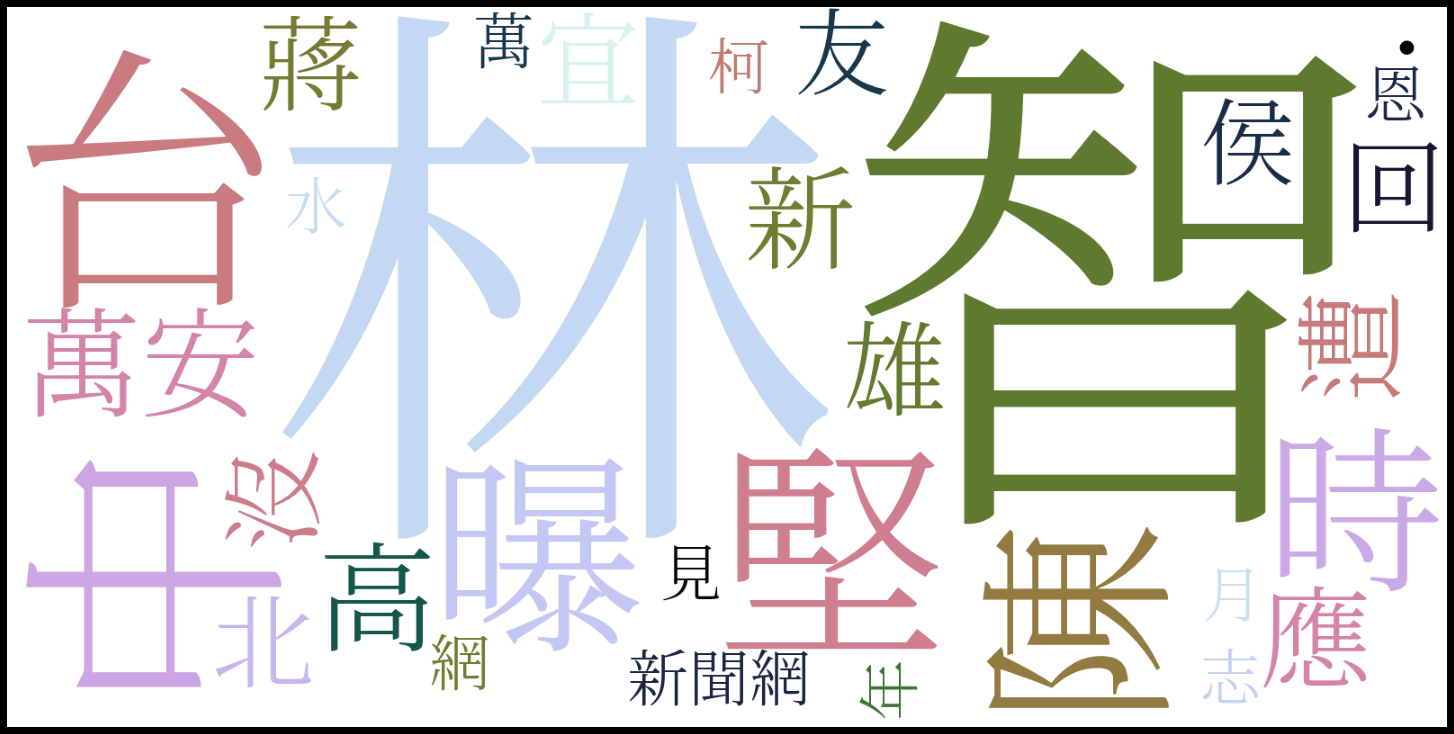

In [33]:
import wordcloud
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
!wget 'https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf'
wordcloud = WordCloud(
        background_color = 'white',
        font_path = 'SourceHanSerifK-Light.otf', # 放入中文字型檔路徑
        colormap=matplotlib.cm.cubehelix,
        width = 1600,
        height = 800,
        margin = 2)
wordcloud = wordcloud.generate_from_frequencies(word_count_4) 
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()